In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

# 0.Define Machine Learning

Machine Learning Requirements:
- There must be data
- The data must be patterned
- The algorithm is already difficult to solve

Machine Learning Workflow :
* 1.Data Profiling 
* 2.Data Cleansing
* 3.Data Exploration
* 4.Feature Engineering
* 5.Modeling
* 6.Evalution & Deployment

# 1.Data Profiling

## 1.1 Load dataset

In [2]:
titanic=pd.read_csv('Titanic.csv')

## 1.2 Preview dataset

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.3 Info dataset

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 1.4 Check missing value 

In [5]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 1.5 Task 1 Data Profiling on data_telco

### 1.5.1 Load dataset

In [6]:
data_telco = pd.read_csv("data_telco.csv")

### 1.5.2 Preview dataset

In [7]:
data_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,NaN,NaN,NaN,1,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,NaN,NaN,NaN,NaN,34,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,NaN,NaN,NaN,NaN,45,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1.5.3 Info dataset

In [8]:
data_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6034 non-null   object 
 2   SeniorCitizen     6034 non-null   float64
 3   Partner           6034 non-null   object 
 4   Dependents        6034 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     6034 non-null   object 
 8   InternetService   6034 non-null   object 
 9   OnlineSecurity    6034 non-null   object 
 10  OnlineBackup      6034 non-null   object 
 11  DeviceProtection  6034 non-null   object 
 12  TechSupport       6034 non-null   object 
 13  StreamingTV       6034 non-null   object 
 14  StreamingMovies   6034 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 1.5.4 Check missing value 

In [9]:
data_telco.isna().sum()

customerID             0
gender              1009
SeniorCitizen       1009
Partner             1009
Dependents          1009
tenure                 0
PhoneService           0
MultipleLines       1009
InternetService     1009
OnlineSecurity      1009
OnlineBackup        1009
DeviceProtection    1009
TechSupport         1009
StreamingTV         1009
StreamingMovies     1009
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

# 2.Data Cleansing

In [10]:
titanic=pd.read_csv('Titanic.csv')

In [11]:
# Coloumn Age

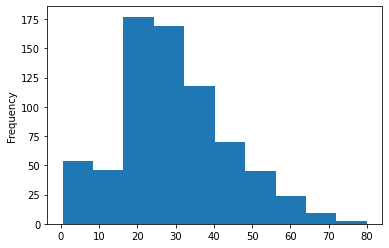

In [12]:
titanic['Age'].plot(kind='hist');

In [13]:
val = titanic['Age'].median()
titanic['Age'] = titanic['Age'].fillna(val)

In [14]:
# Coloumn Cabin

In [15]:
titanic['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [16]:
# To delete the Cabin column
titanic.drop('Cabin',axis=1,inplace = True)

In [17]:
# Column Embarked

In [18]:
titanic['Embarked'] = titanic.Embarked.fillna("Unknown")
titanic['Embarked'].value_counts()

S          644
C          168
Q           77
Unknown      2
Name: Embarked, dtype: int64

In [19]:
# Column SibSp and Column Parch

In [20]:
titanic['Alone']= titanic['SibSp']+titanic["Parch"]
titanic['Alone'][titanic['Alone']>0]="With Family"
titanic['Alone'][titanic['Alone']==0]="Without Family"

In [21]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Without Family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Without Family


In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Alone        891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Task 2 Data Cleansing on data_telco

In [23]:
data_telco = pd.read_csv("data_telco.csv")
data_telco.head(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,NaN,NaN,NaN,1,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,NaN,NaN,NaN,NaN,34,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,NaN,NaN,NaN,NaN,45,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,NaN,NaN,NaN,NaN,8,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,NaN,NaN,NaN,NaN,22,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,NaN,NaN,NaN,NaN,10,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,NaN,NaN,NaN,NaN,28,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,NaN,NaN,NaN,NaN,62,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [24]:
data_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6034 non-null   object 
 2   SeniorCitizen     6034 non-null   float64
 3   Partner           6034 non-null   object 
 4   Dependents        6034 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     6034 non-null   object 
 8   InternetService   6034 non-null   object 
 9   OnlineSecurity    6034 non-null   object 
 10  OnlineBackup      6034 non-null   object 
 11  DeviceProtection  6034 non-null   object 
 12  TechSupport       6034 non-null   object 
 13  StreamingTV       6034 non-null   object 
 14  StreamingMovies   6034 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
data_telco.isna().sum()

customerID             0
gender              1009
SeniorCitizen       1009
Partner             1009
Dependents          1009
tenure                 0
PhoneService           0
MultipleLines       1009
InternetService     1009
OnlineSecurity      1009
OnlineBackup        1009
DeviceProtection    1009
TechSupport         1009
StreamingTV         1009
StreamingMovies     1009
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

# 3.Data Exploration

In [26]:
# Describe 

In [27]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
# Survived and Non Survived

In [29]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survived and Non Survived')

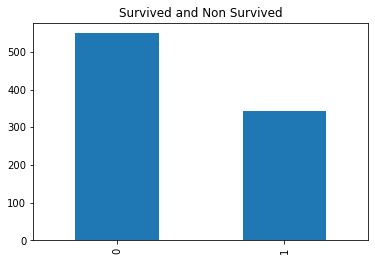

In [30]:
titanic['Survived'].value_counts().plot(kind='bar');
plt.title("Survived and Non Survived")

In [31]:
titanic_survived2 = pd.DataFrame(titanic['Survived'].value_counts())
titanic_survived2['Status'] = ['Dies','Alive']
titanic_survived2

,Survived,Status
0,549,Dies
1,342,Alive


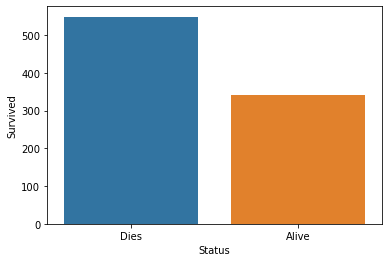

In [32]:
sns.barplot(x='Status',y='Survived',data=titanic_survived2);

In [33]:
persen = (titanic[(titanic['Survived']==0)].shape[0]/titanic['Survived'].shape[0])*100
persen

61.61616161616161

As many as 61.6 percent of Titanic passengers did not survive

In [34]:
# PClass

In [35]:
titanic['Pclass'].value_counts() 

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Passenger Class')

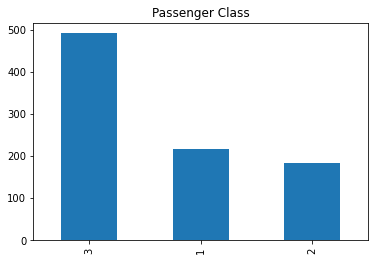

In [36]:
titanic['Pclass'].value_counts().plot(kind='bar');
plt.title("Passenger Class")

Titanic passengers are mostly in class 3

In [37]:
# Alone

In [38]:
titanic['Alone'].value_counts()

Without Family    537
With Family       354
Name: Alone, dtype: int64

Text(0.5, 1.0, 'With Family and Without Family')

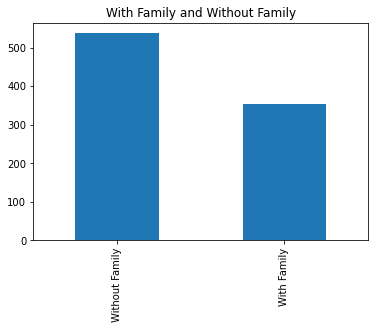

In [39]:
titanic['Alone'].value_counts().plot(kind='bar');
plt.title("With Family and Without Family")

Titanic passengers are mostly alone without bringing their families

In [40]:
# Embarked

In [41]:
titanic['Embarked'].value_counts()

S          644
C          168
Q           77
Unknown      2
Name: Embarked, dtype: int64

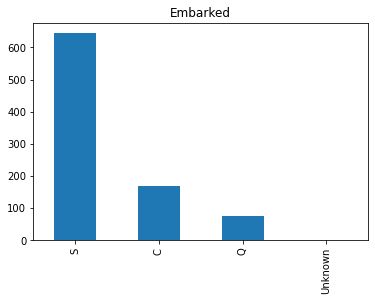

In [42]:
titanic['Embarked'].value_counts().plot(kind='bar');
plt.title('Embarked');

In [43]:
# Corelation 

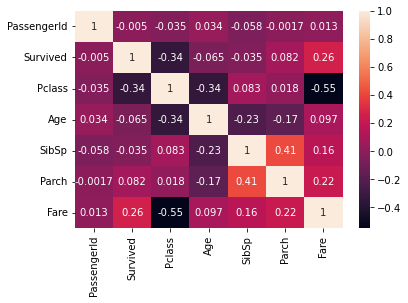

In [44]:
plt.figure(figsize = (6,4))
sns.heatmap(titanic.corr(),annot=True);

# Multicollinearity
* Multicollinearity must be taken down by one of them. The characteristics in seaborn are dark in color, but it depends on each company. Usually it is above 0.5, both positive and negative, including multicollinearity.

* Multicollinearity means redundancy.

* Examples in the real world have dollars and rupiah

# 4.Feature Engineering

* Can do the transformation to machine learning. 
* Machine Learning can only accept numeric

One Hot End for categorical data. The goal is to be smarter

In [45]:
# Column Sex

In [46]:
sex_enc = pd.get_dummies(titanic['Sex'],prefix="Sex",drop_first = False)
sex_enc

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [47]:
titanic = titanic.drop(['Sex'],axis = 1)

In [48]:
titanic = pd.concat([titanic,sex_enc],axis = 1)
titanic

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,With Family,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,With Family,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,Without Family,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,With Family,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,Without Family,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,S,Without Family,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,S,Without Family,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,S,With Family,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C,Without Family,0,1


In [49]:
# Column Embarked
embarked_enc = pd.get_dummies(titanic['Embarked'], prefix = 'Embarked', drop_first = False)
titanic = titanic.drop(['Embarked'], axis = 1)
titanic = pd.concat([titanic, embarked_enc], axis = 1)
titanic

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,With Family,0,1,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,With Family,1,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Without Family,1,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,With Family,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Without Family,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,Without Family,0,1,0,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,Without Family,1,0,0,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,With Family,1,0,0,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,Without Family,0,1,1,0,0,0


In [50]:
# Column Alone

alone_enc = pd.get_dummies(titanic['Alone'],prefix = 'Alone',drop_first = False)
titanic = titanic.drop(['Alone'], axis = 1)
titanic = pd.concat([titanic, alone_enc], axis = 1)
titanic

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown,Alone_With Family,Alone_Without Family
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0,1,0,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,1,0,0,0,1,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,1,0,0,0,1,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,0,1,1,0,0,0,0,1


In [51]:
# Coloumn Pclass

In [52]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [53]:
titanic['Pclass'] = titanic['Pclass'].map({1:0,2:1,3:2})
titanic['Pclass'].value_counts()

2    491
0    216
1    184
Name: Pclass, dtype: int64

In [54]:
# StandardScaler

In [55]:
scaler = StandardScaler ()

In [56]:
titanic[['Age']] = scaler.fit_transform(titanic[['Age']])

In [57]:
titanic[['Fare']] = scaler.fit_transform(titanic[['Fare']])

In [58]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown,Alone_With Family,Alone_Without Family
0,1,0,2,"Braund, Mr. Owen Harris",-0.565736,1,0,A/5 21171,-0.502445,0,1,0,0,1,0,1,0
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.663861,1,0,PC 17599,0.786845,1,0,1,0,0,0,1,0
2,3,1,2,"Heikkinen, Miss. Laina",-0.258337,0,0,STON/O2. 3101282,-0.488854,1,0,0,0,1,0,0,1
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.433312,1,0,113803,0.420730,1,0,0,0,1,0,1,0
4,5,0,2,"Allen, Mr. William Henry",0.433312,0,0,373450,-0.486337,0,1,0,0,1,0,0,1


# Preprocessing Modeling
* Feature Selection by deleting several columns. The reason for the column being dropped is a description with a # sign

In [59]:
# Feature Selection

In [60]:
titanic.drop('Name',axis=1,inplace = True) #too unique

In [61]:
titanic.drop('Ticket',axis=1,inplace = True) #too unique

In [62]:
titanic.drop('Fare',axis=1,inplace = True) #multicolinear

In [63]:
titanic.drop('PassengerId',axis = 1,inplace = True) #identifier

* too unique because the data is too unique (too many different values).

* multicolinear because we have to delete one of the multicollinear columns, that is, we delete the ticket column from the Fare and Pclass columns

* the identifier if it continues to appear later is like giving an answer to machine learning

In [64]:
# Feature Importance

In [65]:
titanic['Survived'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [66]:
x = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

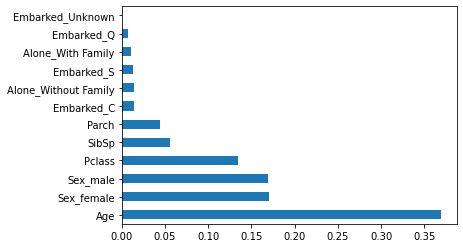

In [67]:
model = ExtraTreesClassifier()
model.fit(x, y)

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(23).plot(kind='barh')
plt.show()

The influences that make people survive are Sex and Pclass

In [68]:
# Train Test Split

Train/test split is one method that can be used to evaluate the performance of machine learning models.

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 42)

## Task Feature Engineering with data_telco

In [70]:
# Coloumn Sex data_telco

In [71]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Survived              891 non-null    int64  
 1   Pclass                891 non-null    int64  
 2   Age                   891 non-null    float64
 3   SibSp                 891 non-null    int64  
 4   Parch                 891 non-null    int64  
 5   Sex_female            891 non-null    uint8  
 6   Sex_male              891 non-null    uint8  
 7   Embarked_C            891 non-null    uint8  
 8   Embarked_Q            891 non-null    uint8  
 9   Embarked_S            891 non-null    uint8  
 10  Embarked_Unknown      891 non-null    uint8  
 11  Alone_With Family     891 non-null    uint8  
 12  Alone_Without Family  891 non-null    uint8  
dtypes: float64(1), int64(4), uint8(8)
memory usage: 41.9 KB


In [72]:
sex_enc_telco = pd.get_dummies(data_telco['gender'],prefix="sex",drop_first = False)
sex_enc_telco

,sex_Female,sex_Male
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
7038,0,1
7039,1,0
7040,1,0
7041,0,1


In [73]:
data_telco = data_telco.drop(['gender'],axis=1)

In [74]:
data_telco = pd.concat([data_telco,sex_enc],axis=1)
data_telco

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Sex_female,Sex_male
0,7590-VHVEG,NaN,NaN,NaN,1,No,NaN,NaN,NaN,NaN,...,NaN,NaN,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.0,1.0
1,5575-GNVDE,NaN,NaN,NaN,34,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,One year,No,Mailed check,56.95,1889.5,No,1.0,0.0
2,3668-QPYBK,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1.0,0.0
3,7795-CFOCW,NaN,NaN,NaN,45,No,NaN,NaN,NaN,NaN,...,NaN,NaN,One year,No,Bank transfer (automatic),42.30,1840.75,No,1.0,0.0
4,9237-HQITU,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,NaN,NaN
7039,2234-XADUH,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,NaN,NaN
7040,4801-JZAZL,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,NaN,NaN
7041,8361-LTMKD,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,NaN,NaN


In [75]:
# Coloumn Contract

In [76]:
data_telco['Contract'].value_counts()


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [77]:
data_telco['Contract'] = data_telco['Contract'].map({"Month-to-month":0,"One year":1,"Two year":2})

In [78]:
# Column Churn

In [79]:
data_telco['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [80]:
data_telco['Churn'] = data_telco['Churn'].map({'Yes':1,'No':0})
data_telco['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [81]:
data_telco['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [82]:
data_telco.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Sex_female,Sex_male
0,7590-VHVEG,NaN,NaN,NaN,1,No,NaN,NaN,NaN,NaN,...,NaN,NaN,0,Yes,Electronic check,29.85,29.85,0,0.0,1.0
1,5575-GNVDE,NaN,NaN,NaN,34,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,1,No,Mailed check,56.95,1889.5,0,1.0,0.0
2,3668-QPYBK,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,0,Yes,Mailed check,53.85,108.15,1,1.0,0.0
3,7795-CFOCW,NaN,NaN,NaN,45,No,NaN,NaN,NaN,NaN,...,NaN,NaN,1,No,Bank transfer (automatic),42.30,1840.75,0,1.0,0.0
4,9237-HQITU,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,0,Yes,Electronic check,70.70,151.65,1,0.0,1.0


# 5.Modelling

<p> Modeling Machine Learning is divided into 3 namely
    
1. Supervised is divided into 4 namely
- Regression for continuous data types
- Decision Tree
- Random Forest
- Classification for discrete data types

2. Unsupervised is divided into 3 namely
- Clustering
- Association analysis
- Hidden Markoy Model

3. Reinforcement is usually made into a game </p>

# Machine Learning Regression - Simple Linear Regression


## Data Profiling


import packages

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

Load dataset

In [84]:
data_salary = pd.read_csv("Salary_Data.csv")

Preview dataset


In [85]:
data_salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Info dataset


In [86]:
data_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Check missing value 


In [87]:
data_salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

## Data Cleansing
data is clean

# Exploratory Data Analysis


In [88]:
data_salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


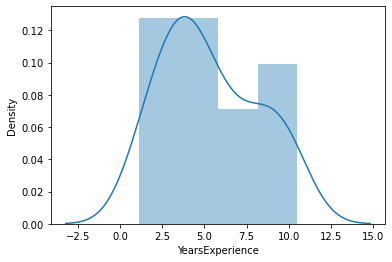

In [89]:
sns.distplot(data_salary['YearsExperience']);

# Preprocessing Modeling 

In [90]:
x = data_salary.drop(['Salary'],axis=1)
y = data_salary['Salary']

* Splitting Training and Test Set


In [91]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 1/3, random_state = 42)

# Machine Learning Regression - Simple Linear Regression
* Fitting into training

# Linear Regression Assumption : 
* Relation between dependant variable and independent variable is linear (boleh berbanding lurus maupun berbanding terbalik)
* Modelnya harus distribusi normal
* There is no multicollinearity

In [92]:
regressor = LinearRegression()

In [93]:
regressor.fit(x_train,y_train)

LinearRegression()

In [94]:
regressor.coef_

array([9337.63985893])

* Predict The Result

In [95]:
y_pred = regressor.predict(x_test)

* Plot The Result

In [96]:
result = pd.DataFrame({'Actual':y_test,'Predict':y_pred})

In [97]:
result

,Actual,Predict
27,112635.0,117549.897898
15,67938.0,73662.990561
23,113812.0,104477.202095
17,83088.0,77398.046504
8,64445.0,57789.002801
9,57189.0,62457.822730
28,122391.0,124086.245799
24,109431.0,109146.022025
12,56957.0,65259.114688
0,39343.0,38179.959097


<function matplotlib.pyplot.show(close=None, block=None)>

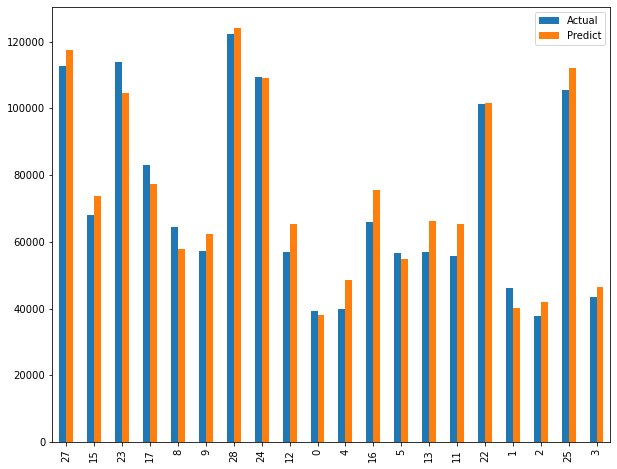

In [98]:
result.plot(kind = 'bar',figsize = (10,8))
plt.show